### Graph Coloring

&nbsp;

Graph coloring is a color assignment problem on graph structures. The color could be assigned to the vertex or the edge. No adjacent vertex or edge (depends on the problem) should have the same color. The coloring may sound like an easy problem. To find an optimal coloring for vertices or edges is in fact NP-hard.

In [1]:
import os
os.chdir('K:/ecole/github/televerser')
import matplotlib.pyplot as plt

#graph adt
#check the below link for more details
# https://github.com/je-suis-tm/graph-theory/blob/master/graph.py
import graph

### Graph ADT

In [2]:
#create graph adt
#exactly the same adt in kcore and maximal clique
ADT=graph.graph()
ADT.append(1,2,0)
ADT.append(1,3,0)
ADT.append(1,4,0)
ADT.append(1,6,0)
ADT.append(2,1,0)
ADT.append(3,1,0)
ADT.append(4,1,0)
ADT.append(6,1,0)

ADT.append(2,3,0)
ADT.append(2,4,0)
ADT.append(2,6,0)
ADT.append(3,2,0)
ADT.append(4,2,0)
ADT.append(6,2,0)

ADT.append(3,4,0)
ADT.append(3,7,0)
ADT.append(4,3,0)
ADT.append(7,3,0)

ADT.append(4,5,0)
ADT.append(5,4,0)

ADT.append(5,6,0)
ADT.append(6,5,0)

In [3]:
ADT.reveal()

{1: {2: 0, 3: 0, 4: 0, 6: 0},
 2: {1: 0, 3: 0, 4: 0, 6: 0},
 3: {1: 0, 2: 0, 4: 0, 7: 0},
 4: {1: 0, 2: 0, 3: 0, 5: 0},
 6: {1: 0, 2: 0, 5: 0},
 7: {3: 0},
 5: {4: 0, 6: 0}}

![alt text](./preview/kcore1.png)

&nbsp;
###### Vertex Coloring
&nbsp;

Certainly there are many vertex coloring algorithms. One of the most popular algorithms is DSatur Algorithm by Daniel Brélaz. It beats greedy algorithm (brute force color assignment to each vertex) in random graph. The faux pas of DSatur is its inability to capture the optimal vertex coloring for all types of graph structures.

Reference to the original paper of DSatur

https://www.semanticscholar.org/paper/New-methods-to-color-the-vertices-of-a-graph-Br%C3%A9laz/fbf8150f45d4358926e40f7005a2f493f39803ae

In [4]:
#this algorithm is the exact replication of heuristic method in the paper mentioned above
def dsatur(ADT):
    """graph coloring with dsatur algorithm"""

    #step 1
    #sort vertices by their degrees
    #check matula beck section in the below link for more details
    # https://github.com/je-suis-tm/graph-theory/blob/master/k%20core.ipynb
    #pick the vertex with the largest degree
    selected_vertex=graph.sort_by_degree(ADT)[0]

    #initialize saturation degree
    saturation_degrees=dict(zip(ADT.vertex(),
                              [0]*ADT.order()))

    #according to brooks theorem
    #upper bound of chromatic number equals to maximum vertex degree plus one
    chromatic_number_upper_bound=range(ADT.degree(selected_vertex)+1)

    #step 2
    #assign the first color to the vertex with the maximum degree
    color_assignments={}
    color_assignments[selected_vertex]=0

    #fill each vertex with color
    while len(color_assignments)<ADT.order():

        #saturation degrees also serve as a queue
        #remove colored vertex from the queue
        saturation_degrees.pop(selected_vertex)

        #update saturation degrees after color assignment
        for node in ADT.edge(selected_vertex):
            if node in saturation_degrees:
                saturation_degrees[node]+=1

        #step 3
        #among uncolored vertices
        #pick a vertex with the largest saturation degree
        check_vertices_degree=[node for node in saturation_degrees if saturation_degrees[node]==max(saturation_degrees.values())]

        #if there is an equality, choose one with the largest degree
        if len(check_vertices_degree)>1:
            degree_distribution=[ADT.degree(node) for node in check_vertices_degree]
            selected_vertex=check_vertices_degree[degree_distribution.index(max(degree_distribution))]
        else:
            selected_vertex=check_vertices_degree[0]

        #step 4
        #exclude colors used by neighbors
        #assign the least possible color to the selected vertex
        excluded_colors=[color_assignments[node] for node in ADT.edge(selected_vertex) if node in color_assignments]
        selected_color=[color for color in chromatic_number_upper_bound if color not in excluded_colors][0]
        color_assignments[selected_vertex]=selected_color

    return color_assignments

In [5]:
#get vertex coloring
vertex_coloring=dsatur(ADT)

In [6]:
#assign coordinates for viz
coordinates={1: (0.5, 3), 2: (0.5, 1),
 3: (1.5, 2), 4: (2, 1),
 5: (1, 0), 6: (0, 0), 7: (3, 3)}

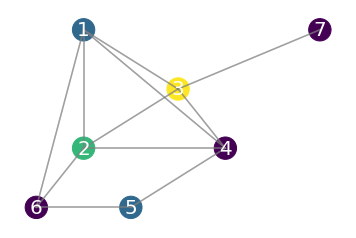

In [7]:
#plot edge
for i in ADT.vertex():
    for j in ADT.edge(i):
        plt.plot([coordinates[i][0],coordinates[j][0]],
                 [coordinates[i][1],coordinates[j][1]],c='grey',alpha=0.5)

#plot vertex
plt.scatter([i[0] for i in coordinates.values()],
           [i[1] for i in coordinates.values()],
           s=500,c=[vertex_coloring[i] for i in coordinates])

#plot vertex label
for i in coordinates:
    plt.text(coordinates[i][0],coordinates[i][1],i,
             va='center',ha='center',color='white',fontsize=20)

#tidy up the chart
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.show()

&nbsp;
###### Edge Coloring
&nbsp;

Certainly there are many edge coloring algorithms as well. One of the most common and the easiest algorithms is Vizing's algorithm. It is a simple greedy algorithm to prove Vizing's theorem where the upper bound of the chromatic index equals to the maximum degree of the graph structure plus one. The malaise of Vizing is its inability to capture the optimal edge coloring for all types of graph structures.

Reference to Vizing algorithm

http://cgi.csc.liv.ac.uk/~michele/TEACHING/COMP309/2003/vizing.pdf

In [8]:
#this is the simplest greedy algorithm to do edge coloring
#it does not guarantee the optimal coloring
def vizing(ADT):
    """greedy algorithm to prove Vizing's theorem"""
    
    #sort vertices by their degrees
    #check matula beck section in the below link for more details
    # https://github.com/je-suis-tm/graph-theory/blob/master/k%20core.ipynb
    #pick the vertex with the largest degree
    selected_vertex=graph.sort_by_degree(ADT)[0]

    #according to vizings theorem
    #upper bound of chromatic index equals to maximum vertex degree plus one
    chromatic_index_upper_bound=set(range(ADT.degree(selected_vertex)+1))

    #initialize
    color_assignments=graph.copy.deepcopy(ADT.reveal())
    for i in color_assignments:
        for j in color_assignments[i]:
            color_assignments[i][j]=-1

    #greedy algorithm
    for node in color_assignments:
        for link in color_assignments[node]:

            #if the edge is uncolored
            if color_assignments[node][link]<0:
                
                #find the intersection of missing colors from both vertices
                existing_colors_node=set(color_assignments[node].values())
                existing_colors_link=set(color_assignments[link].values())
                existing_colors=existing_colors_node.union(existing_colors_link)
                
                #assign the first missing color
                missing_colors=chromatic_index_upper_bound.difference(existing_colors)
                selected_color=list(missing_colors)[0]
                color_assignments[node][link]=selected_color
                color_assignments[link][node]=selected_color
                
    return color_assignments

In [9]:
#rainbow edge colors
edge_colors={0: '#ff0f00', 1: '#ffa600',
             2: '#7fff00', 3: '#00ffb1', 4: '#001dff'}

In [10]:
#get edge coloring
edge_coloring=vizing(ADT)

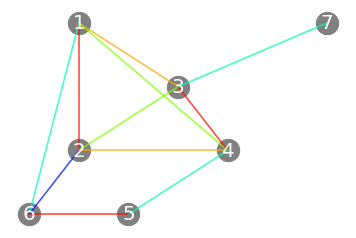

In [11]:
#plot vertex
plt.scatter([i[0] for i in coordinates.values()],
           [i[1] for i in coordinates.values()],
           s=500,c='grey')

#plot vertex label
for i in coordinates:
    plt.text(coordinates[i][0],coordinates[i][1],i,
             va='center',ha='center',color='white',fontsize=20)
    
#plot edge
for i in ADT.vertex():
    for j in ADT.edge(i):
        plt.plot([coordinates[i][0],coordinates[j][0]],
                 [coordinates[i][1],coordinates[j][1]],
                 c=edge_colors[edge_coloring[i][j]],
                 alpha=0.5)


#tidy up the chart
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.show()